# Analisis de Datos de Marketing
### Para el desarollo de esta tarea vamos a realizar el analisis de los datos de marketing que hemos recibido para aplicar todo lo que hemos venido aprendiendo hasta ahora en el Bootcamp

## Fase 1: Limpieza y Preparación de Datos

### Primero vamos a importamos las librerias necesarias y el dataset

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore

In [408]:
url = 'C:/Users/david.frigerio_softo/Documents/GitHub/Desafio-de-Marketing/data/marketingcampaigns.csv'
df = pd.read_csv(url, on_bad_lines='warn') # En este caso me daba un error de datos con mas columnas de las esperadas y como eran poco datos (5 o 6) los limpié a mano
df.head(5)

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_32224\622035376.py:2: ParserWarning: Skipping line 1003: expected 10 fields, saw 11

  df = pd.read_csv(url, on_bad_lines='warn') # En este caso me daba un error de datos con mas columnas de las esperadas y como eran poco datos (5 o 6) los limpié a mano


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


### A continuación voy a revisar las primeras y ultimas filas del dataset para tener una idea de la estructura de los datos

In [409]:
# Primeras files
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


In [410]:
# Ultimas filas
df.tail(10)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1026,Broken-date campaign,2023-13-01,2024-01-01,25000,0.45,email,B2B,organic,NaN,87500.0
1027,Negative ROI test,2022-10-10,2023-05-05,-10000,-0.20,podcast,B2C,referral,0.10,NaN
1028,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,B2B,social media,NaN,NaN,NaN
1029,Future campaign,2025-01-01,2025-06-01,75000,0.90,webinar,B2C,promotion,0.65,200000.0
1030,Extra long name campaign test,2023-04-15,2023-09-15,30000,0.25,email,NaN,paid,0.40,45000.0
1031,No revenue campaign,2023-02-01,2023-08-01,20000,0.30,social media,B2B,organic,0.50,NaN
1032,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.0
1033,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.20,50000.0
1034,Overlapping dates,2023-03-01,2022-12-31,60000,0.60,webinar,B2B,paid,0.70,90000.0
1035,Too many conversions,2023-05-01,2023-11-01,40000,0.80,social media,B2C,organic,1.50,120000.0


### Por el nombre de las ultimas 8 campañas ("typo in date", "duplicated campaign", etc) ya podemos ver que esos registros tienen algunas inconsistencias, lo tendremos en cuenta para la limpieza

### Ahora veremos los tipos de datos de cada columna y su coherencia

In [411]:
df.dtypes

campaign_name       object
start_date          object
end_date            object
budget              object
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object

Podemos ver que hay tipos de datos inconsistentes en las columnas start and end date y budge. Lo tenemos en cuenta para luego corregirlo.

### A continuación voy a revisar los valores faltantes y su distribución por columna

In [412]:
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

<Axes: >

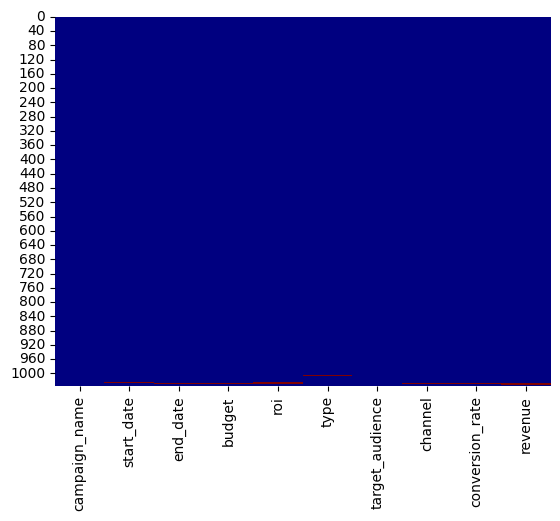

In [413]:
sns.heatmap(df.isnull(), cbar=False, linecolor='red', cmap='jet')

Veamnos la importancia de peso de los nulos por columna

In [414]:
df.isnull().sum() / df.shape[0] * 100

campaign_name      0.000000
start_date         0.096525
end_date           0.193050
budget             0.289575
roi                0.386100
type               0.096525
target_audience    0.193050
channel            0.096525
conversion_rate    0.386100
revenue            0.289575
dtype: float64

Antes de ver estadisticas descriptivas, vamos a corregir el tipo de dato de la columna budget que hemos visto que es inconsistente, de lo contrario no podremos hacer operaciones matematicas con esto

In [415]:
df['budget'] = df['budget'].astype('float', errors='ignore')
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


In [416]:
df.dtypes

campaign_name       object
start_date          object
end_date            object
budget              object
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object

In [417]:
df['budget'].sort_values(ascending=False)

1033         abc
1012     9999999
53      99957.15
330     99891.35
28      99838.63
          ...   
1032      100000
1027      -10000
1004         NaN
1007         NaN
1028         NaN
Name: budget, Length: 1036, dtype: object

Parece que la columna budget tiene un formato de string y no se ha corregido con la función astype, voy a probar con la función to_numeric

In [418]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df.dtypes

campaign_name       object
start_date          object
end_date            object
budget             float64
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object

Bien, eso ha corregido el typo de dato de Budget. Vamos a ver ahora si este cambio ha generado muchos nulos o si ha eliminado muchos registros

In [419]:
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             4
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [420]:
df.__len__()

1036

In [421]:
df['budget'].sort_values(ascending=False)

1012    9999999.00
1032     100000.00
53        99957.15
330       99891.35
28        99838.63
           ...    
1027     -10000.00
1004           NaN
1007           NaN
1028           NaN
1033           NaN
Name: budget, Length: 1036, dtype: float64

Veamos algunas estadisticas descriptivas de las columnas numéricas para detectar posibles anomalias y outliers

In [422]:
df.describe()

,budget,roi,conversion_rate,revenue
count,1.032000e+03,1032.000000,1032.000000,1033.000000
mean,5.886964e+04,0.533353,0.541831,509895.192527
std,3.110969e+05,0.261558,0.267376,288055.421792
min,-1.000000e+04,-0.200000,0.000000,-15000.000000
25%,2.473549e+04,0.310000,0.300000,266449.670000
50%,4.686534e+04,0.530000,0.550000,517206.570000
75%,7.486708e+04,0.760000,0.770000,764590.330000
max,9.999999e+06,0.990000,1.500000,999712.490000


Vamos a ver la distribución de los valors numericos

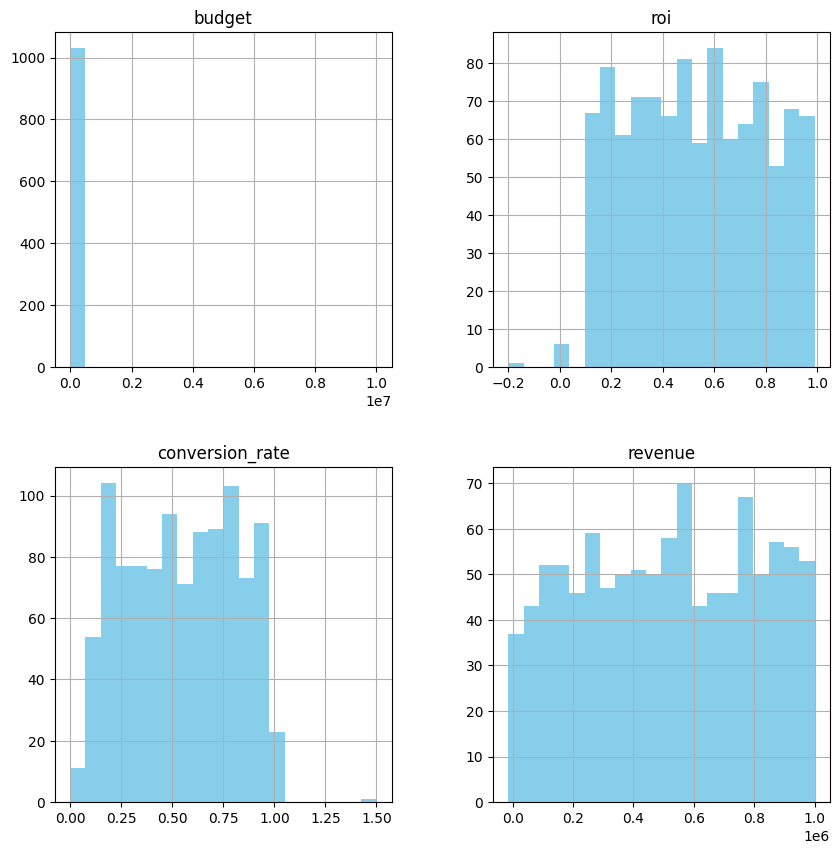

In [423]:
# Vamos a ver la distribución de los valors numericos
df.hist(figsize=(10,10), color='skyblue', bins=20)
plt.show()

Se pueden observar algunos outliers en conversion rate y ROI. Budget se ve muy extaño, voy a probar con un boxplot para ver mejor

<Axes: xlabel='budget'>

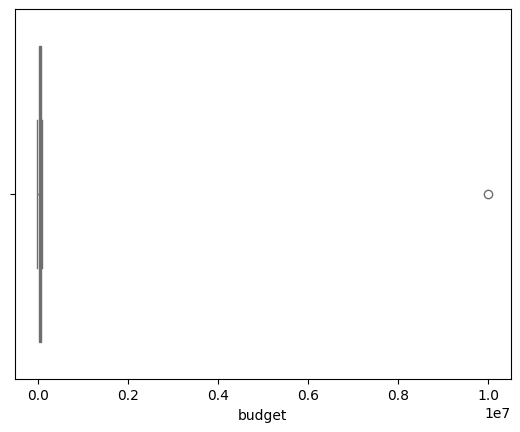

In [424]:
sns.boxplot(x=df['budget'], color='skyblue')

Me lo apunto para limpiar luego ya que hay unos outliers muy grandes en Budget, algunas tasas de ROI muy altas y algunos valores negativos en conversion rate, que no tiene sentido con la definición de la métrica.

### Veamos la cantidad de duplicados

In [425]:
df.duplicated(keep=False).sum()

np.int64(28)

### A ver si puedo ver los duplicados para darme una idea de como se ven

In [426]:
df_duplicados = df.duplicated(keep=False)
df[df_duplicados].sort_values(by='campaign_name')

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1001,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
1015,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
11,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,0.55,174462.47
1024,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,0.55,174462.47
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
1014,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
1016,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
1002,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73


Pues si, se ven unos 27 valores duplicados y claramente son datos de campañas repetidas, por lo que no tienen sentido. Vamos a apuntarlo para eliminarlo luego.

## Ahora veamos como se comportan las variables categoricas

Columna: type
type
email           289
webinar         268
social media    242
podcast         234
event             1
B2B               1
Name: count, dtype: int64


Columna: target_audience
target_audience
B2B             531
B2C             502
social media      1
Name: count, dtype: int64


Columna: channel
channel
promotion    281
referral     259
organic      250
paid         244
referal        1
Name: count, dtype: int64




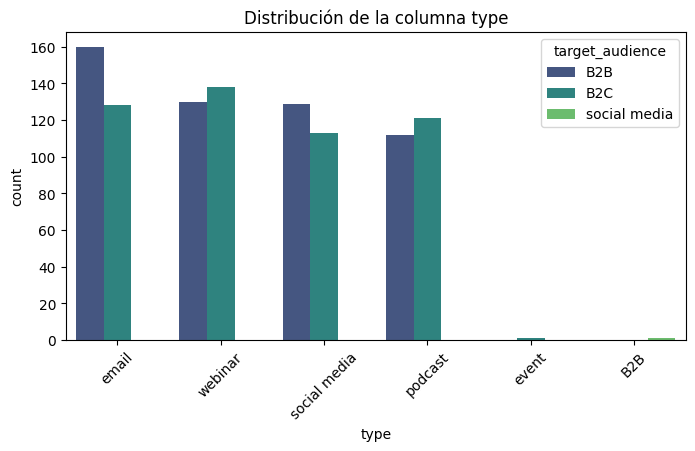

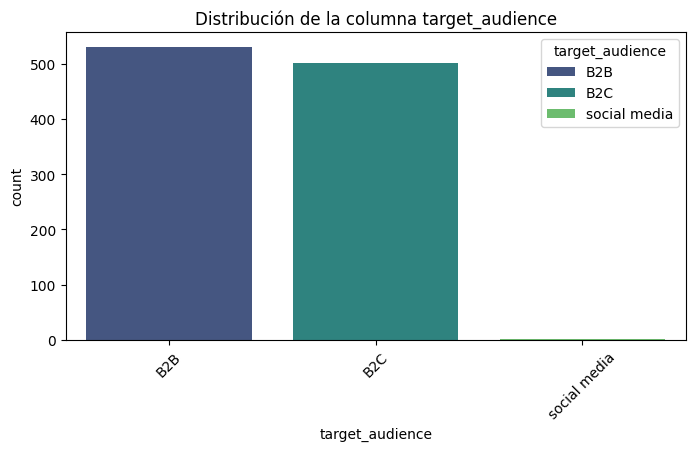

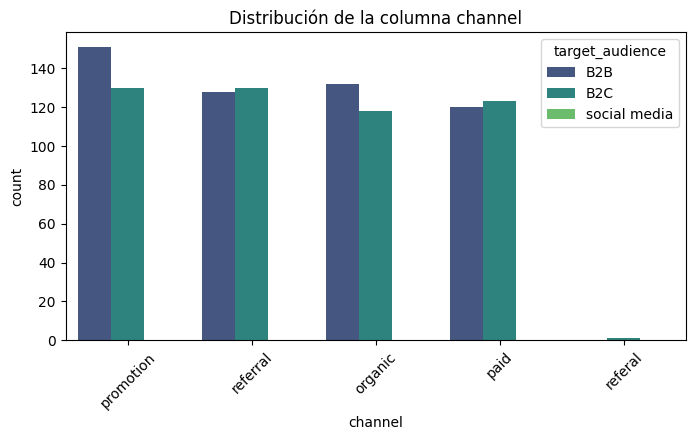

In [427]:
# Veamos la cantidad de valores únicos por cada columna categórica
categorical_columns = ['type', 'target_audience', 'channel']
for col in categorical_columns:
    print(f"Columna: {col}")
    print(df[col].value_counts())
    print("\n")

# Visualización de la distribución de las variables categóricas
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis', hue='target_audience')
    plt.title(f"Distribución de la columna {col}")
    plt.xticks(rotation=45)
    plt.show()

La columna channel tiene 4 valores unicos, y se ve correcta, sin embargo type y target audience tienen valores que no corresponden a lo que deberian ser, vamos a tenerlo en cuenta para corregirlo luego

## Documentamos los problemas encontrados en esta fase y los coloco en orden de prioridad
- **Inconsistencia tipo de dato:** Tipo de dato incorrecto para start_date, end_date y budget (el de budget ya se corrigió para poder hacer analítica descritpiva)
- **Valores nulos:** Hay valores nulos en general pero para todas las columnas representa menos de un 1% de los datos, por lo que no es un problema grave
- **Outliers:** Hay outliers en conversion_rate y ROI, pero son pocos y podria limpiarse no parece ser un problema grave. Sin embargo, Buget tiene un comportamiento muy extraño y hay que revisar si los outliers son errores o quizás alguna campaña real con un budget muy alto, esto merece revisión.
- **Duplicados:** Hay 27 registros duplicados, no es un gran problema grave pero se deberían eliminar para no tener problemas en el análisis
- **Inconsistencia en valores:** Hay valores en type que no corresponden a lo que deberían ser, es apenas 1 registro asi que no representa un gran problema y podría limpiarse.

# Vamos a comenzar a limpiar los datos. Comenzamos con el manejo de los valores faltantes.

In [428]:
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             4
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [429]:
df.isnull().sum() / df.shape[0] * 100

campaign_name      0.000000
start_date         0.096525
end_date           0.193050
budget             0.386100
roi                0.386100
type               0.096525
target_audience    0.193050
channel            0.096525
conversion_rate    0.386100
revenue            0.289575
dtype: float64

Para start date y end date son muy pocos los valores nulos y su peso asi que se justifica eliminarlos ya que no tenemos una forma matemática para reemplazarlos. Se podria ver la relacion entre diferentes variables para estimar la duración promedio de una campaña en particular y si tenemos una de ambas fechas podriamos calcular la otra, pero mo merece la pena por la poca cantidad de nulos.

Para budget, reemplazaremos los nulos por un valor que represente la media para cada tipo de campaña/channel (organic, paid, referral, etc) y typo (email, podcast, webinar, etc)

In [430]:
df[df['budget'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1004,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,NaN,0.59,social media,B2C,referral,0.67,558302.11
1007,NEW CAMPAIGN - Missing Budget,2023-10-01,2024-01-15,NaN,0.25,email,B2B,organic,NaN,45000.00
1028,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,B2B,social media,NaN,NaN,NaN
1033,Invalid budget,2022-12-01,2023-06-01,NaN,NaN,email,B2C,promotion,0.20,50000.00


# Para budget vamos a reemplazar los nulos por la media de cada tipo de campaña y channel


In [431]:
df['budget'] = df['budget'].fillna(df.groupby(['channel', 'type'])['budget'].transform('mean'))

Vamos a comprobar si para alguno de los valores nulos que ha reemplazado para budget lo ha hecho bien

In [432]:
df.iloc[1003]

campaign_name      Front-line executive infrastructure
start_date                                  2023-07-07
end_date                                    2024-05-15
budget                                         39291.9
roi                                                0.3
type                                      social media
target_audience                                    B2B
channel                                      promotion
conversion_rate                                   0.81
revenue                                       47511.35
Name: 1003, dtype: object

In [433]:
df[(df['type'] == 'social media') & (df['channel'] == 'referral')]['budget'].mean()

np.float64(43114.58508771929)

Pues si, vemos que para el registro 1003 que antes era nulo, ahora tiene un valor de budget que parece coherente con el promedio de 43664.03 de la misma type y channel

# Para "type" vamos ver si podemos reemplazar con el valor 'unknown' o utilizar técnicas de imputación basadas en otras variables

In [434]:
df[(df['type'] == 'event') | (df['type'] == 'B2B')]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1025,Cloud-based scalable solution,NaN,2023-12-31,50000.0,NaN,event,B2C,paid,0.3,120000.0
1028,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,B2B,social media,NaN,NaN,NaN


Para el registro 1024 pdemos ver que se ha cometido un error y las columnas type y target_audience estan invertidas, vamos a corregirlo

In [435]:
df.loc[1024,'type']='social media'
df.iloc[1024]

campaign_name      Cross-platform demand-driven encoding
start_date                                    2023-07-21
end_date                                      2023-11-04
budget                                          64041.37
roi                                                 0.16
type                                        social media
target_audience                                      B2B
channel                                        promotion
conversion_rate                                     0.55
revenue                                        174462.47
Name: 1024, dtype: object

In [436]:
df.loc[1024,'target_audience']='B2B'
df.iloc[1024]

campaign_name      Cross-platform demand-driven encoding
start_date                                    2023-07-21
end_date                                      2023-11-04
budget                                          64041.37
roi                                                 0.16
type                                        social media
target_audience                                      B2B
channel                                        promotion
conversion_rate                                     0.55
revenue                                        174462.47
Name: 1024, dtype: object

Vamos a ver para conversion rate a ver si puedo utilizar otras variables que estén correlacionadas para imputar los valores nulos

In [437]:
df['budget'].round().sort_values(ascending=False)

1012    9999999.0
1033     175596.0
1032     100000.0
53        99957.0
330       99891.0
          ...    
38         1309.0
887        1224.0
252        1053.0
1027     -10000.0
1028          NaN
Name: budget, Length: 1036, dtype: float64

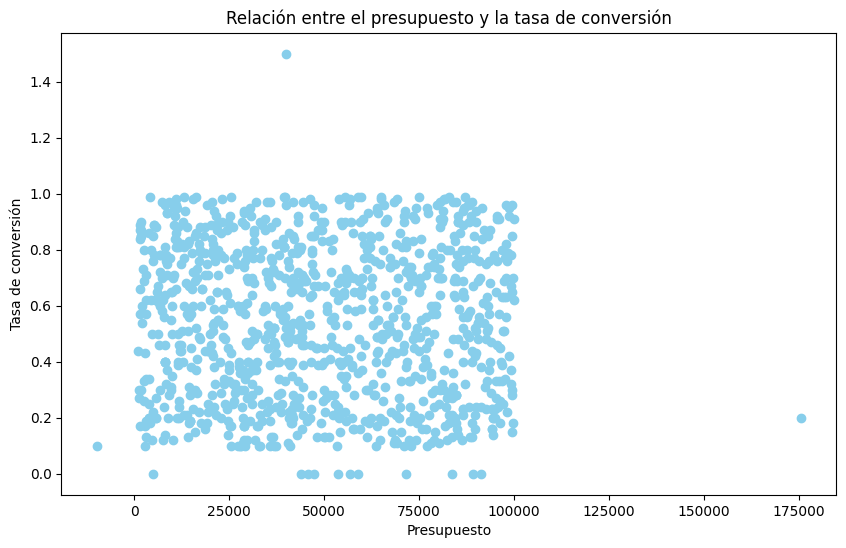

In [438]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['budget'] < 9000000]['budget'], df[df['budget'] < 9000000]['conversion_rate'], color='skyblue')
plt.title('Relación entre el presupuesto y la tasa de conversión')
plt.xlabel('Presupuesto')
plt.ylabel('Tasa de conversión')
plt.show()

Parece que no ha correlación entre budget y conversion rate, veamos todas las variables juntas con seaborn

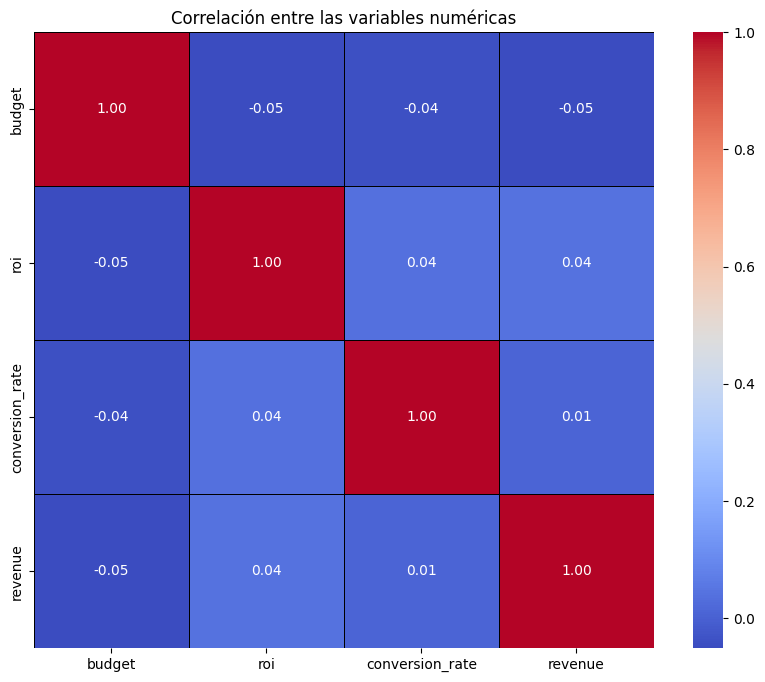

In [439]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlación entre las variables numéricas')
plt.show()

No se ve una relación directa con otras variables. Podriamos estimar valores para ROI, budget, converstion rate y revenue en base al canal, tipo de campaña y audiencia objetivo, Son muy pocos valores nulos y podria eliminarse, pero a efectos de practicar y aprender lo  haré :D 


Comenzamos con los valores nulos de ROI

In [440]:
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35


In [441]:
# Rellenamos los valores de ROI nulos con la mediana segun el canal, tipo y audiencia objetivo 
df['roi'] = df['roi'].fillna(df.groupby(['channel', 'type', 'target_audience'])['roi'].transform('mean'))
df.isnull().sum()


campaign_name      0
start_date         1
end_date           2
budget             1
roi                3
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [442]:
df[df['roi'].isnull()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1025,Cloud-based scalable solution,NaN,2023-12-31,50000.0,NaN,event,B2C,paid,0.3,120000.0
1028,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,B2B,social media,NaN,NaN,NaN
1032,Random mess,2023-06-06,NaN,100000.0,NaN,podcast,NaN,referral,NaN,300000.0


Puedo ver que solo me relleno un nulo de los 4 ya que los otros 3 no los puede calcular por algún motivo, continuaré eliminando el resto de nulos que son pocos y habíamos visto que eran menos del 1% de los datos para cada columna

In [443]:
df.dropna(inplace=True)
df.isnull().sum()

campaign_name      0
start_date         0
end_date           0
budget             0
roi                0
type               0
target_audience    0
channel            0
conversion_rate    0
revenue            0
dtype: int64

### Habiamos visto antes que los duplicados se ven bien y tiene sentido, los podemos eliminar

In [444]:
df.drop_duplicates(inplace=True)

In [445]:
# Reviso de nuevo a ver si hay duplicados ahora
df.duplicated(keep=False).sum()

np.int64(0)

Vemmos ahora si han cambiado mucho los datos luego de corregir, eliminar nulos y duplicados

In [446]:
df.describe()

,budget,roi,conversion_rate,revenue
count,1.011000e+03,1011.000000,1011.000000,1011.000000
mean,5.941413e+04,0.536550,0.543887,514316.868348
std,3.142887e+05,0.261536,0.267904,287464.613959
min,1.052570e+03,0.000000,0.000000,-15000.000000
25%,2.497893e+04,0.310000,0.300000,268849.840000
50%,4.719852e+04,0.540000,0.550000,520779.280000
75%,7.494910e+04,0.770000,0.770000,770432.990000
max,9.999999e+06,0.990000,1.500000,999712.490000


Vamos a corregir las fechas que vimos que no tenian el tipo de dato correcto

In [447]:
# I will cast the start  date
df['start_date'] = pd.to_datetime(df['start_date'], format='mixed', yearfirst=True, dayfirst=True)
df.dtypes

campaign_name              object
start_date         datetime64[ns]
end_date                   object
budget                    float64
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object

In [448]:
# I will cast the end date
df['end_date'] = pd.to_datetime(df['end_date'], format='mixed', yearfirst=True)
df.dtypes

DateParseError: day is out of range for month: 2024-02-30, at position 1002

Me da un error por que una fecha de febrero está mal, lo vamos a corregir a mano con el ultimo dia de febrero de 2024

In [449]:
#df[df['campaign_name'] == 'Typo in Date']['end_date'].replace('2024-02-29', value='date', inplace=True)
#df.loc[1001,'end_date'] = '2024-02-29'
#df.drop(1001, inplace=True)
df.reset_index(drop=True, inplace=True)
df.loc[1002]

campaign_name             Typo in Date
start_date         2023-01-13 00:00:00
end_date                    2024-02-30
budget                         50000.0
roi                               0.65
type                           webinar
target_audience                    B2C
channel                      promotion
conversion_rate                    0.9
revenue                       320000.0
Name: 1002, dtype: object

In [450]:
df.loc[1002,'end_date']='2024-02-29'
df.loc[1002]

campaign_name             Typo in Date
start_date         2023-01-13 00:00:00
end_date                    2024-02-29
budget                         50000.0
roi                               0.65
type                           webinar
target_audience                    B2C
channel                      promotion
conversion_rate                    0.9
revenue                       320000.0
Name: 1002, dtype: object

In [451]:
df.dtypes

campaign_name              object
start_date         datetime64[ns]
end_date                   object
budget                    float64
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object

In [452]:
# I will cast the end date
df['end_date'] = pd.to_datetime(df['end_date'], format='mixed', yearfirst=True)
df.dtypes

campaign_name              object
start_date         datetime64[ns]
end_date           datetime64[ns]
budget                    float64
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object

### Vamos a ver si hay algunos datos atipicos o anomalos

Miramos primero las distribuciones de las variables numericas

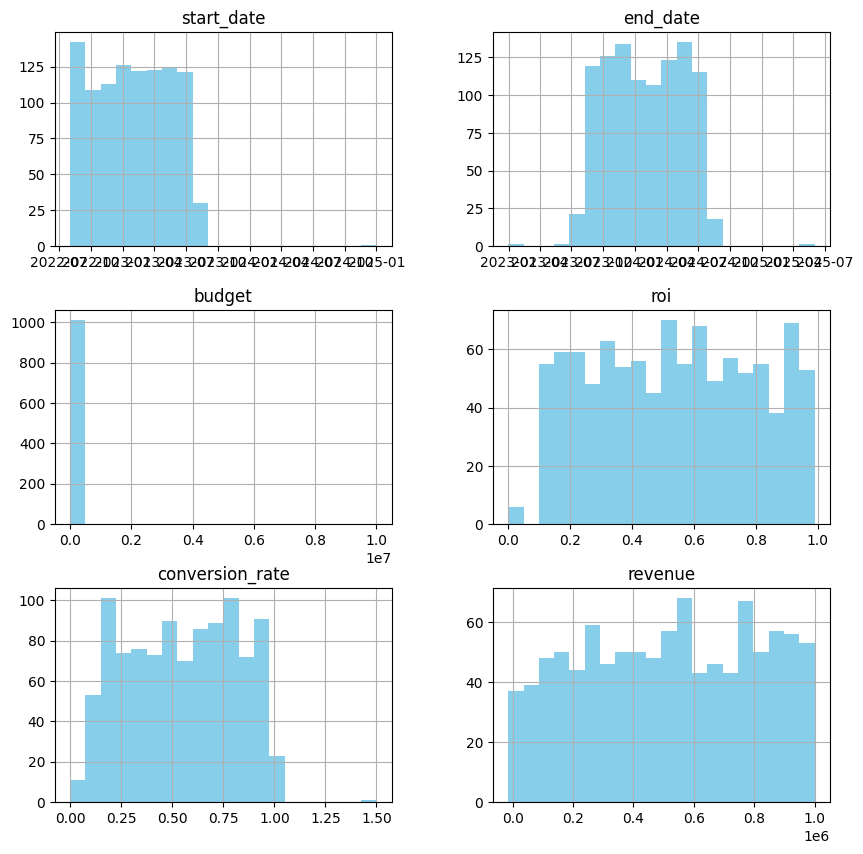

In [453]:
df.hist(figsize=(10,10), color='skyblue', bins=20)
plt.show()

Vamos a intentar usar tecnicas como IQR or Z-score para detectar outliers

In [454]:


# Detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detectar outliers usando z-score
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = zscore(data[column])
    return data[(z_scores < -threshold) | (z_scores > threshold)]

# Aplicar las técnicas a las columnas numéricas
numeric_columns = ['budget', 'roi', 'conversion_rate', 'revenue']
for col in numeric_columns:
    print(f"Outliers en {col} usando IQR:")
    print(detect_outliers_iqr(df, col))
    print("\nOutliers en {col} usando z-score:")
    print(detect_outliers_zscore(df, col))

# Para las fechas, detectamos anomalías basándonos en rangos lógicos
print("Fechas de inicio fuera de rango lógico:")
print(df[(df['start_date'] < '2000-01-01') | (df['start_date'] > '2025-03-30')])

print("\nFechas de fin fuera de rango lógico:")
print(df[(df['end_date'] < '2000-01-01') | (df['end_date'] > '2025-12-31')])

Outliers en budget usando IQR:
       campaign_name start_date   end_date        budget       roi   type  \
1006  Outlier Budget 2023-07-01 2024-03-01  9.999999e+06  0.100000  email   
1008  Invalid budget 2022-12-01 2023-06-01  1.755962e+05  0.491944  email   

     target_audience    channel  conversion_rate  revenue  
1006             B2B  promotion              0.2  50000.0  
1008             B2C  promotion              0.2  50000.0  

Outliers en {col} usando z-score:
       campaign_name start_date   end_date     budget  roi   type  \
1006  Outlier Budget 2023-07-01 2024-03-01  9999999.0  0.1  email   

     target_audience    channel  conversion_rate  revenue  
1006             B2B  promotion              0.2  50000.0  
Outliers en roi usando IQR:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []

Outliers en {col} usando z-score:
Empty DataFrame
Columns: [campaign_name, start_date, end

Vamos a eliminar los outliers identificados

In [455]:
# Eliminamos los outliers de budgets 1003 y 1005
df.drop([1006, 1008], inplace=True)

Buscamos outliers nuevamente 

In [456]:
# Aplicar las técnicas a las columnas numéricas
numeric_columns = ['budget', 'roi', 'conversion_rate', 'revenue']
for col in numeric_columns:
    print(f"Outliers en {col} usando IQR:")
    print(detect_outliers_iqr(df, col))
    print("\nOutliers en {col} usando z-score:")
    print(detect_outliers_zscore(df, col))

# Para las fechas, detectamos anomalías basándonos en rangos lógicos
print("Fechas de inicio fuera de rango lógico:")
print(df[(df['start_date'] < '2000-01-01') | (df['start_date'] > '2025-03-30')])

print("\nFechas de fin fuera de rango lógico:")
print(df[(df['end_date'] < '2000-01-01') | (df['end_date'] > '2025-12-31')])

Outliers en budget usando IQR:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []

Outliers en {col} usando z-score:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []
Outliers en roi usando IQR:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []

Outliers en {col} usando z-score:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []
Outliers en conversion_rate usando IQR:
             campaign_name start_date   end_date   budget  roi          type  \
1010  Too many conversions 2023-05-01 2023-11-01  40000.0  0.8  social media   

     target_audience  channel  conversion_rate   revenue  
1010             B2C  organic      

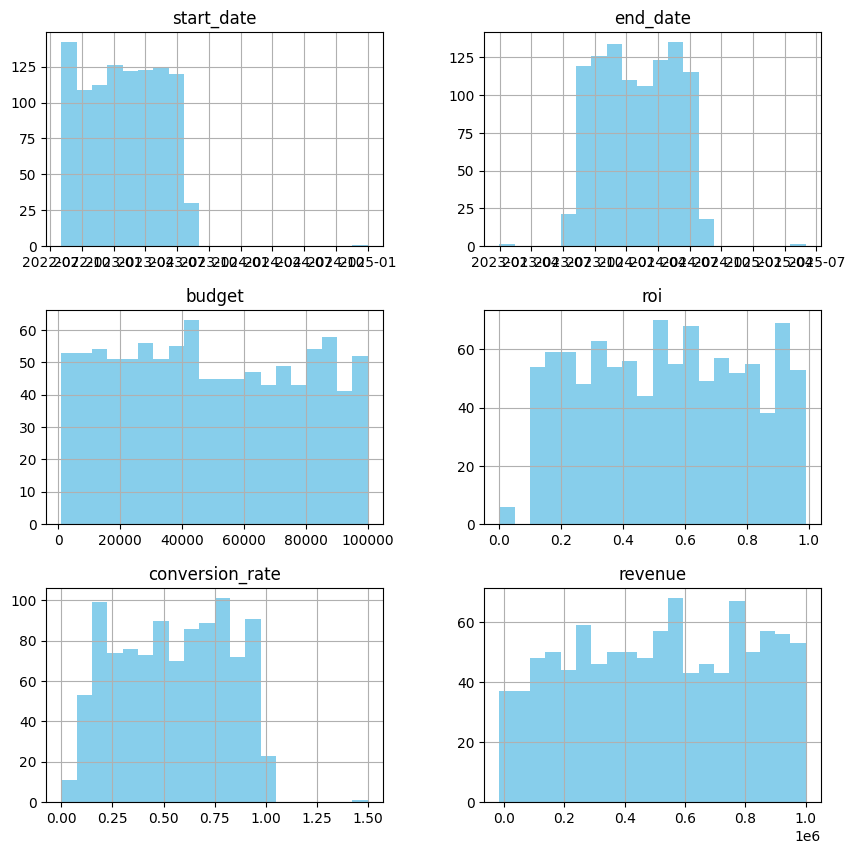

In [457]:
df.hist(figsize=(10,10), color='skyblue', bins=20)
plt.show()

Ya ha desaparecido el outlier de Budget, veamos end date y start date

In [460]:
df.sort_values(by='end_date', ascending=False).head(10)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1007,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00
800,Robust maximized Graphic Interface,2022-09-17,2024-07-31,95291.59,0.30,social media,B2B,organic,0.27,804844.50
611,Integrated national architecture,2023-07-14,2024-07-31,32039.70,0.86,social media,B2B,referral,0.97,334033.28
989,Open-source fault-tolerant open architecture,2023-06-03,2024-07-31,29827.35,0.52,webinar,B2C,referral,0.36,310553.26
954,Visionary composite task-force,2022-10-22,2024-07-30,68203.64,0.74,email,B2B,organic,0.56,931667.61
609,Intuitive well-modulated support,2022-08-14,2024-07-30,94357.67,0.80,email,B2C,organic,0.14,988161.51
591,Implemented multi-tasking emulation,2022-11-13,2024-07-30,10934.43,0.26,webinar,B2C,promotion,0.66,892351.21
824,Profit-focused next generation installation,2023-03-12,2024-07-30,16505.53,0.21,podcast,B2C,paid,0.29,401190.17
950,Visionary client-driven pricing structure,2022-09-11,2024-07-29,4675.43,0.68,social media,B2B,paid,0.50,641884.20
290,Reactive zero tolerance core,2023-05-14,2024-07-29,75067.13,0.95,podcast,B2C,promotion,0.44,967358.10


Eliminamos la future campaign ya que aún no ha concluido

In [461]:
df.drop([1007], inplace=True)

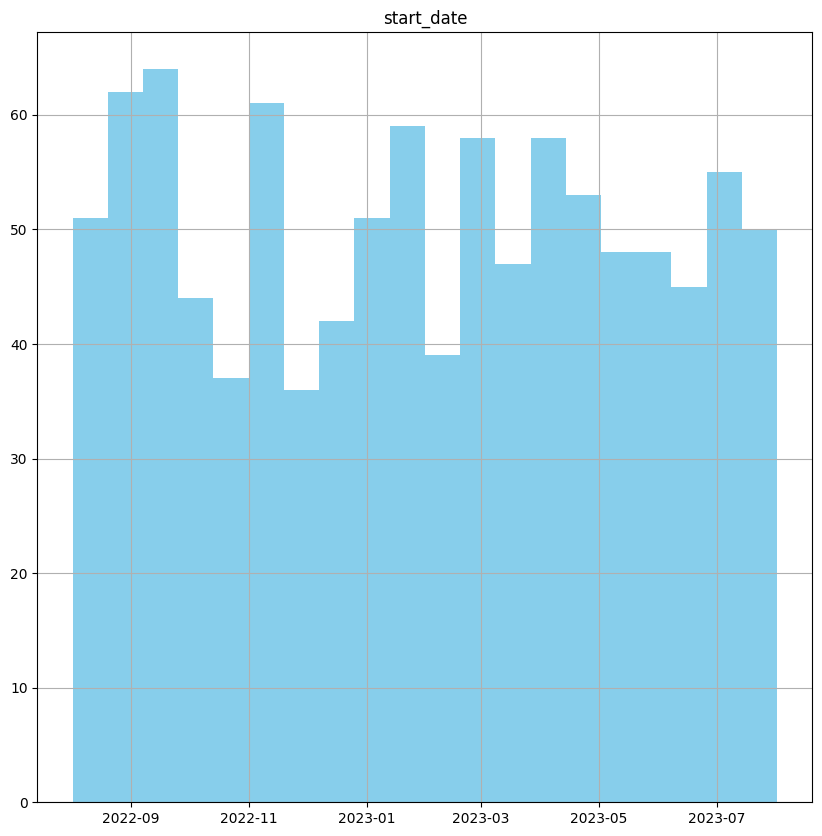

In [462]:
df.hist(figsize=(10,10), color='skyblue', bins=20, column='start_date')
plt.show()

vemos que Start date ya no tiene outliers, veamos ahora end date

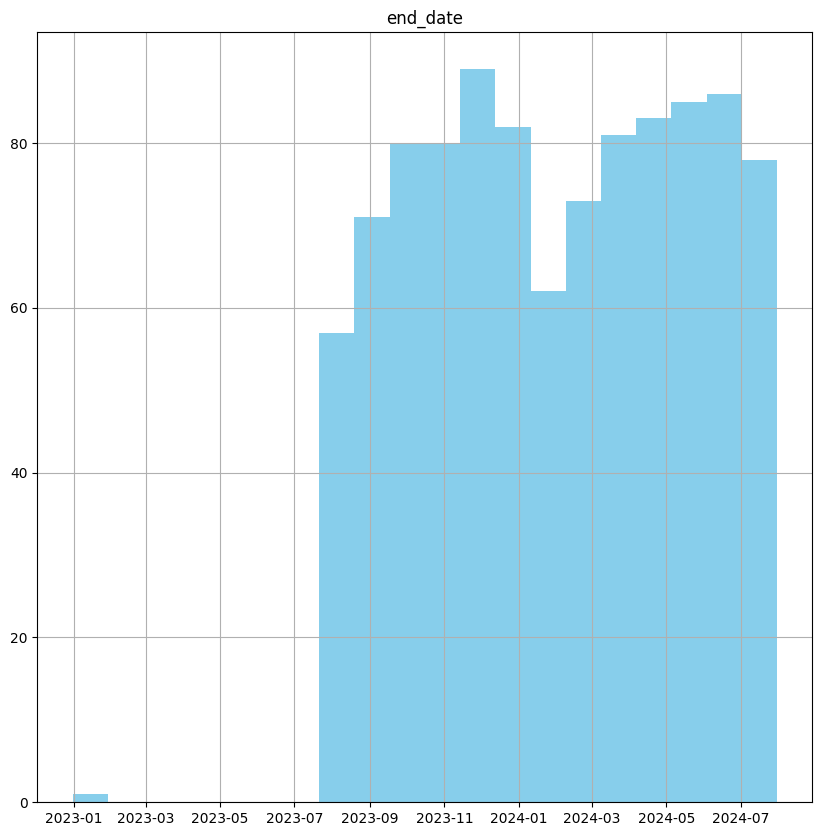

In [466]:
df.hist(figsize=(10,10), color='skyblue', bins=20, column='end_date')
plt.show()

In [467]:
df.sort_values(by='end_date', ascending=True).head(10)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1009,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00
918,Quality-focused fault-tolerant secured line,2023-02-01,2023-08-02,8324.30,0.68,webinar,B2C,promotion,0.76,875993.48
616,Synergized 24/7 interface,2022-11-09,2023-08-02,22675.22,0.52,webinar,B2B,referral,0.78,402920.91
337,Re-engineered 24/7 benchmark,2022-10-07,2023-08-02,60761.56,0.60,podcast,B2C,paid,0.46,560912.60
289,Diverse asymmetric orchestration,2023-02-22,2023-08-02,86507.56,0.39,email,B2C,paid,0.40,468536.15
526,Persevering tangible hardware,2023-06-08,2023-08-02,67475.35,0.50,email,B2B,promotion,0.22,53555.95
506,Quality-focused responsive framework,2023-07-10,2023-08-03,38390.23,0.72,podcast,B2B,paid,0.57,261442.83
344,Virtual methodical projection,2022-08-28,2023-08-03,2939.44,0.23,podcast,B2B,referral,0.34,517886.30
108,User-centric responsive software,2022-09-24,2023-08-04,55105.95,0.39,email,B2B,paid,0.65,980593.34
342,Cloned background ability,2023-05-08,2023-08-05,6690.98,0.95,podcast,B2C,referral,0.60,419310.48


Hay una campaña que tiene fecha de inicio posteriro a la fecha de fin, lo cual no tiene sentido, vamos a eliminarla y avisamos al departamento relevante

In [468]:
df.drop([1009], inplace=True)

Vemos ahora conversion Rate

In [470]:
df.sort_values(by='conversion_rate', ascending=False).head(15)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1010,Too many conversions,2023-05-01,2023-11-01,40000.00,0.80,social media,B2C,organic,1.50,120000.00
697,Customizable clear-thinking adapter,2023-07-22,2024-04-30,74856.71,0.43,podcast,B2B,referral,0.99,266833.31
886,Sharable background circuit,2022-08-26,2024-06-15,39380.23,0.58,email,B2B,referral,0.99,878859.45
712,Reverse-engineered attitude-oriented task-force,2023-03-12,2024-07-28,82832.93,0.73,social media,B2B,organic,0.99,974376.54
276,Function-based exuding strategy,2023-04-30,2024-02-25,87156.45,0.40,social media,B2C,referral,0.99,95274.70
984,Vision-oriented zero tolerance hardware,2023-01-13,2023-12-28,25534.30,0.90,email,B2C,paid,0.99,141758.95
504,Advanced client-driven matrix,2023-07-02,2024-06-24,58920.71,0.74,social media,B2B,organic,0.99,416433.63
785,Managed regional process improvement,2023-06-14,2023-09-19,65007.53,0.70,email,B2B,promotion,0.99,429137.69
206,Switchable mobile toolset,2023-06-25,2024-04-16,59590.26,0.83,podcast,B2B,referral,0.99,574709.76
454,Vision-oriented transitional process improvement,2023-06-27,2023-11-26,55436.70,0.80,podcast,B2B,organic,0.99,786705.70


Tenemos la cmampaña "Too many conversions" que es claramente un outlier y lo eliminamos

In [471]:
df.drop([1010], inplace=True)

Revisamo ROI

In [473]:
df.sort_values(by='roi', ascending=True).head(15)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
390,Multi-tiered object-oriented knowledge user,2023-04-22,2023-10-28,52804.87,0.0,email,B2C,paid,0.25,880106.40
110,Upgradable transitional productivity,2022-12-25,2024-05-12,28460.11,0.0,social media,B2B,paid,0.37,593949.35
297,Customizable executive task-force,2022-08-31,2024-02-10,14777.50,0.0,email,B2C,promotion,0.38,865674.86
321,Polarized systematic parallelism,2023-01-03,2024-04-25,5479.95,0.0,social media,B2B,organic,0.62,775127.75
663,Optional responsive approach,2023-06-23,2023-08-15,96511.42,0.0,email,B2C,referral,0.40,526682.95
210,Mandatory grid-enabled throughput,2023-06-07,2023-08-06,63938.71,0.0,email,B2C,referral,0.49,890569.79
478,Configurable systematic concept,2023-01-30,2023-12-03,89283.48,0.1,email,B2B,referral,0.67,907297.81
144,Cross-platform composite matrix,2022-10-30,2024-02-25,46976.52,0.1,webinar,B2C,organic,0.85,371431.14
935,Innovative logistical interface,2023-03-05,2023-10-25,99579.39,0.1,social media,B2C,organic,0.28,758121.44
551,Profound demand-driven secured line,2023-03-19,2024-01-29,71007.37,0.1,email,B2C,paid,0.92,777359.75


Revisamos oultier a ver como va quedando

In [475]:
# Aplicar las técnicas a las columnas numéricas
numeric_columns = ['budget', 'roi', 'conversion_rate', 'revenue']
for col in numeric_columns:
    print(f"Outliers en {col} usando IQR:")
    print(detect_outliers_iqr(df, col))
    print("\nOutliers en {col} usando z-score:")
    print(detect_outliers_zscore(df, col))

Outliers en budget usando IQR:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []

Outliers en {col} usando z-score:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []
Outliers en roi usando IQR:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []

Outliers en {col} usando z-score:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []
Outliers en conversion_rate usando IQR:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, type, target_audience, channel, conversion_rate, revenue]
Index: []

Outliers en {col} usando z-score:
Empty DataFrame
Columns: [campaign_name, start_date, end_date, budget, roi, 

Ya no parecen haber outliers con las tecnicas de IQR y Z-Score, veamos la grafica

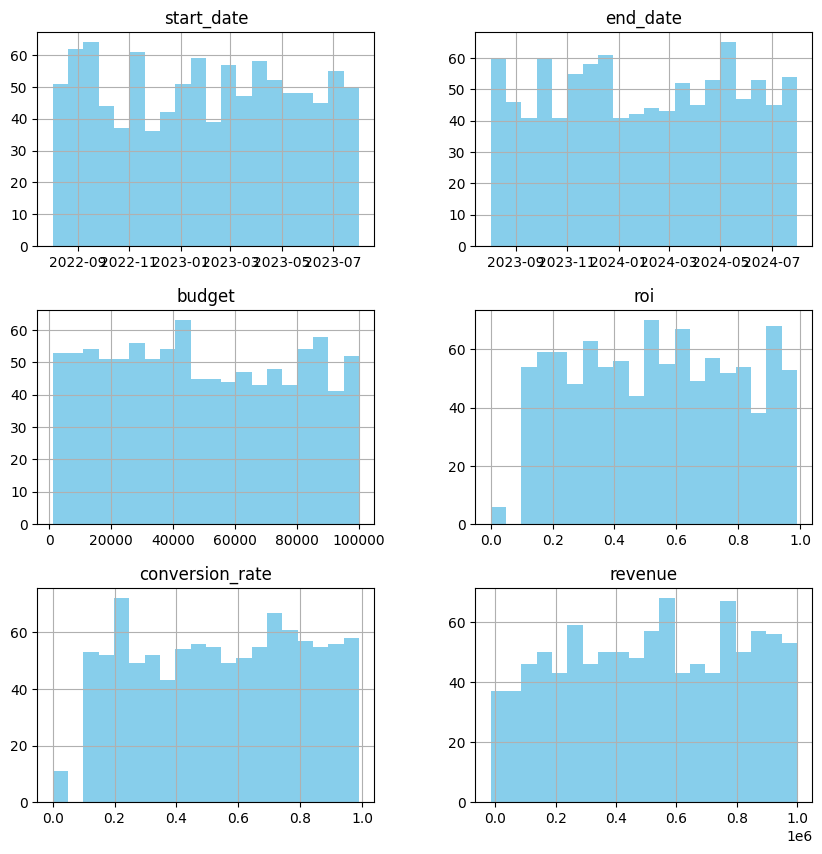

In [476]:
df.hist(figsize=(10,10), color='skyblue', bins=20)
plt.show()

## Vamos a crear variables derivadas ahora

In [477]:
df['net_profit'] = df['revenue'] - df['budget']
df.head(5)


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,701511.18
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,498896.12
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,373584.32
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,75368.98
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,8219.45


Extrae componentes temporales de la fecha (mes, trimestre, año) para análisis estacional

In [480]:
df['mes_inicio'] = df['start_date'].dt.month
df['mes_fin'] = df['end_date'].dt.month
df['año_inicio'] = df['start_date'].dt.year
df['año_fin'] = df['end_date'].dt.year
df['trimestre_inicio'] = df['start_date'].dt.quarter
df['trimestre_fin'] = df['end_date'].dt.quarter
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit,mes_inicio,mes_fin,año_inicio,año_fin,trimestre_inicio,trimestre_fin
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,701511.18,4,2,2023,2024,2,1
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,498896.12,2,4,2023,2024,1,2
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,373584.32,12,10,2022,2023,4,4
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,75368.98,9,9,2022,2023,3,3
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,8219.45,7,5,2023,2024,3,2


Vamos a crear categorías de rendimiento basadas en ROI y tasa de conversión

In [481]:
# Crear categorías para ROI
df['roi_category'] = pd.cut(df['roi'], bins=[-float('inf'), 0.3, 0.6, float('inf')], labels=['Bajo', 'Medio', 'Alto'])

# Crear categorías para la tasa de conversión
df['conversion_rate_category'] = pd.cut(df['conversion_rate'], bins=[-float('inf'), 0.3, 0.6, float('inf')], labels=['Bajo', 'Medio', 'Alto'])

# Crear una categoría combinada de rendimiento
def categorize_performance(row):
    if row['roi_category'] == 'Alto' and row['conversion_rate_category'] == 'Alto':
        return 'Excelente'
    elif row['roi_category'] in ['Medio', 'Alto'] and row['conversion_rate_category'] in ['Medio', 'Alto']:
        return 'Bueno'
    elif row['roi_category'] == 'Bajo' or row['conversion_rate_category'] == 'Bajo':
        return 'Regular'
    else:
        return 'Deficiente'

df['performance_category'] = df.apply(categorize_performance, axis=1)

# Mostrar las primeras filas para verificar
df[['roi', 'conversion_rate', 'roi_category', 'conversion_rate_category', 'performance_category']].head()

,roi,conversion_rate,roi_category,conversion_rate_category,performance_category
0,0.35,0.40,Medio,Medio,Bueno
1,0.74,0.66,Alto,Alto,Excelente
2,0.37,0.28,Medio,Bajo,Regular
3,0.47,0.19,Medio,Bajo,Regular
4,0.30,0.81,Bajo,Alto,Regular


In [482]:
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit,mes_inicio,mes_fin,año_inicio,año_fin,trimestre_inicio,trimestre_fin,roi_category,conversion_rate_category,performance_category
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,701511.18,4,2,2023,2024,2,1,Medio,Medio,Bueno
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,498896.12,2,4,2023,2024,1,2,Alto,Alto,Excelente
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,373584.32,12,10,2022,2023,4,4,Medio,Bajo,Regular
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,75368.98,9,9,2022,2023,3,3,Medio,Bajo,Regular
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,8219.45,7,5,2023,2024,3,2,Bajo,Alto,Regular


Vamos a calcular métricas de eficiencia como 'cost_per_conversion'


In [483]:
# Calcular el costo por conversión
df['cost_per_conversion'] = df['budget'] / df['conversion_rate']

# Mostrar las primeras filas para verificar
df[['budget', 'conversion_rate', 'cost_per_conversion']].head()

,budget,conversion_rate,cost_per_conversion
0,8082.30,0.40,20205.750000
1,17712.98,0.66,26837.848485
2,84643.10,0.28,302296.785714
3,14589.75,0.19,76788.157895
4,39291.90,0.81,48508.518519


### Ya con eso hemos hecho lo siguiente:
- Importamos las librerias necesarias y el dataset
- Revisamos la descripción, los nulos, los repetidos
- Eliminamos los duplicados y los nulos
- Hicimos el casting necesario para fechas, y floats

Ahora vamos colocar el data set final limpio

In [109]:
df.to_csv('C:/Users/david.frigerio_softo/Documents/GitHub/Desafio-de-Marketing/data/marketingcampaigns_clean.csv', index=False)